# CAR PRICE PREDICTION

### Data Description

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some
cars are in demand hence making them costly and some are not in demand hence cheaper. One
of our clients works with small traders, who sell used cars. With the change in market due to covid
19 impact, our client is facing problems with their previous car price valuation machine learning
models. So, they are looking for new machine learning models from new data. We have to make
car price valuation model. The project contains two phases, In the first phase we have collected different data of used cars and this is the second phase in which we need to build a machine learning model. And before model building we need to do all data pre-processing steps and try different models with different hyper parameters and select the best
model.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
df= pd.read_excel('finalcars.xlsx')
df

,Unnamed: 0,Year of manufacture,Company,Model,Variant,Fuel type,Location,Kilometers driven,No. of Owners,Transmission,Mileage,Seats,Price
0,0,2019,Maruti,Swift Dzire,VXI 1.2,Petrol,ahmedabad,"9,718 Kms",1st Owner,Manual,21.21 kmpl,5,"6,65,000"
1,1,2011,Honda,City,1.5 V MT,Petrol,ahmedabad,"38,647 Kms",1st Owner,Manual,17 kmpl,5,"3,99,500"
2,2,2012,Maruti,Alto K10,LXI,Petrol,ahmedabad,"89,579 Kms",1st Owner,Manual,20.92 kmpl,5,"1,77,500"
3,3,2016,Maruti,Wagon R,VXI,Petrol,ahmedabad,"81,674 Kms",1st Owner,Manual,21.79 kmpl,5,"3,60,000"
4,4,2012,Maruti,Eeco,5 Seater AC,Petrol,ahmedabad,"57,341 Kms",1st Owner,Manual,16.11 kmpl,5,"2,79,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6227,6227,2018,Mercedes-Benz,GLA,200 d Sport,Diesel,Chandigarh,"28,200",First,Automatic,17.9 kmpl,5 Person,28.5 Lakh
6228,6228,2013,Audi,A4,2.0 TDI (177bhp) Premium Plus,Diesel,Chandigarh,"47,800",Second,Automatic,17.11 kmpl,5 Person,14 Lakh
6229,6229,2018,Audi,A6,35 TDI Matrix,Diesel,Chandigarh,"22,000",First,Automatic,16.66 kmpl,5 Person,36.5 Lakh
6230,6230,2013,Audi,A6,2.0 TDI Premium,Diesel,Chandigarh,"63,300",First,Automatic,16.66 kmpl,5 Person,16.5 Lakh


### EDA and Data Cleaning

In [3]:
df.shape

(6232, 13)

Here we have 6232 rows and 13 columns to work with.

In [4]:
df.columns

Index(['Unnamed: 0', 'Year of manufacture', 'Company', 'Model', 'Variant',
       'Fuel type', 'Location', 'Kilometers driven', 'No. of Owners',
       'Transmission', 'Mileage', 'Seats', 'Price'],
      dtype='object')

We can see that we have an index column in our dataset, which is of no use to us. Lets drop it.

In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
# Checking the data types

df.dtypes

Year of manufacture     int64
Company                object
Model                  object
Variant                object
Fuel type              object
Location               object
Kilometers driven      object
No. of Owners          object
Transmission           object
Mileage                object
Seats                  object
Price                  object
dtype: object

We can see all the features except the year column contain object type data, even the target column. But as price, mileage,seats etc cannot be an object, we need to clean them to keep only the real data.

In [7]:
# Checking for null values

df.isnull().sum()

Year of manufacture     0
Company                 0
Model                   0
Variant                 0
Fuel type               0
Location                1
Kilometers driven       0
No. of Owners           0
Transmission           60
Mileage                 0
Seats                   0
Price                   0
dtype: int64

We can see 1 null value in location column and 60 in transmission column. 

In [8]:
df[df['Location'].isnull()]

,Year of manufacture,Company,Model,Variant,Fuel type,Location,Kilometers driven,No. of Owners,Transmission,Mileage,Seats,Price
3621,2017,Maruti,Wagon R 1.0,VXI,Petrol,NaN,"35,421 km",1st Owner,MANUAL,20.5,5,"4,07,299"


Only one record can be seen having null value for location column, hence we can drop the record.

In [9]:
df.drop([3621], inplace = True )

In [10]:
df[df['Transmission'].isnull()]

,Year of manufacture,Company,Model,Variant,Fuel type,Location,Kilometers driven,No. of Owners,Transmission,Mileage,Seats,Price
1894,2021,Hyundai,VENUE,S MT 1.2 KAPPA,Petrol,DELHI,"2,589 km",1st Owner,NaN,-,-,"8,07,999"
1899,2016,Honda,City,1.5 E MT PETROL,Petrol,DELHI,"31,190 km",1st Owner,NaN,11.6,5,"5,26,199"
1957,2017,Renault,Kwid,CLIMBER 1.0 AT,Petrol,DELHI,"11,721 km",1st Owner,NaN,24.04,5,"3,78,299"
2058,2017,Renault,Kwid,RXL1.0 EASY-R AT,Petrol,DELHI,"32,258 km",1st Owner,NaN,24.04,5,"3,01,799"
2066,2017,Maruti,Alto K10,VXI (O) AMT,Petrol,DELHI,"20,764 km",2nd Owner,NaN,-,-,"3,24,499"
2072,2020,Maruti,S PRESSO,VXI,Petrol,DELHI,"3,176 km",1st Owner,NaN,-,-,"3,98,999"
2081,2020,Maruti,S PRESSO,VXI,Petrol,NOIDA,"3,176 km",1st Owner,NaN,-,-,"3,98,999"
2093,2021,Hyundai,VENUE,S MT 1.2 KAPPA,Petrol,NOIDA,"2,589 km",1st Owner,NaN,-,-,"8,07,999"
2134,2019,Hyundai,GRAND I10 NIOS,Asta Petrol,Petrol,NOIDA,"3,747 km",1st Owner,NaN,-,-,"6,17,599"
2136,2017,Renault,Kwid,CLIMBER 1.0 AT,Petrol,NOIDA,"11,721 km",1st Owner,NaN,24.04,5,"3,78,299"


We have 60 null values for transmission column. We need to replace them.

In [11]:
# Replacing the missing values

from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy= 'most_frequent')
df['Transmission']= imp.fit_transform(df['Transmission'].values.reshape(-1,1))

In [12]:
df.isnull().sum()

Year of manufacture    0
Company                0
Model                  0
Variant                0
Fuel type              0
Location               0
Kilometers driven      0
No. of Owners          0
Transmission           0
Mileage                0
Seats                  0
Price                  0
dtype: int64

Now, we see there are no null values present. Lets visualize and see.

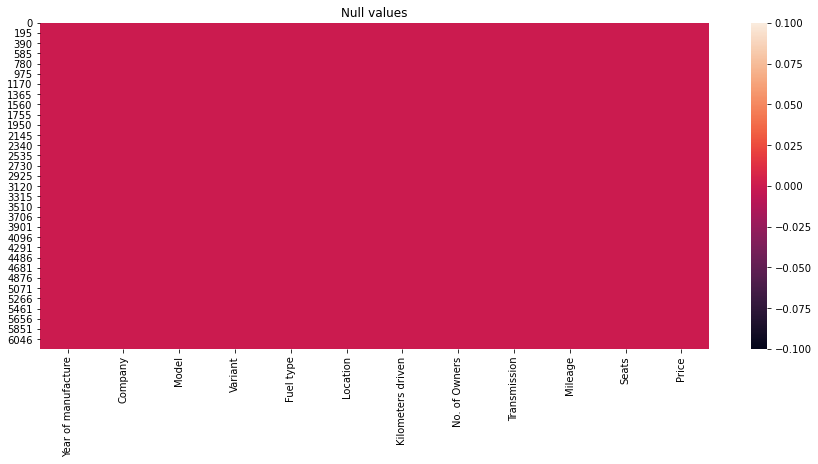

In [13]:
plt.figure(figsize=[15,6])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

In [14]:
# Lets check the unique values.

for i in range(len(df.columns)):
    print(df.columns[i])
    print(df[df.columns[i]].unique())

Year of manufacture
[2019 2011 2012 2016 2020 2013 2018 2017 2010 2014 2015 2008 2004 2009
 2007 2006 2003 2021 2005 1988]
Company
['Maruti' 'Honda' 'Volkswagen' 'Hyundai' 'Toyota' 'Renault' 'Chevrolet'
 'Ford' 'Nissan' 'Audi' 'BMW' 'Mahindra' 'Jaguar' 'Mercedes-Benz' 'Kia'
 'Skoda' 'Tata' 'Datsun' 'New' 'Land' 'Fiat' 'Mini' 'Porsche' 'Volvo' 'MG'
 'Mitsubishi' 'Jeep' 'KIA' 'Mercedes' 'Maruti Suzuki' 'Hummer' 'MINI'
 'Land Rover' 'Ssangyong' 'Isuzu' 'Lamborghini']
Model
['Swift Dzire' 'City' 'Alto K10' 'Wagon R' 'Eeco' 'Vento' 'Baleno' 'Wagon'
 'i20' 'Brio' 'Etios' 'Lodgy' 'Beat' 'Swift' 'Innova' 'S-Presso'
 'Ecosport' 'Terrano' 'Amaze' 'Verna' 'Grand i10' 'Q3' 'EcoSport' 'Polo'
 'Jetta' 'Passat' 'Santa' 'Ertiga' 'Grand' 'Xcent' '5' 'Xylo' 'Q5'
 'Evalia' 'XF' 'C-Class' 'SX4' 'A4' 'EON' 'Jazz' 'Figo' 'Vitara' 'XUV500'
 'BRV' 'Seltos' 'Kodiaq' 'Harrier' 'Mobilio' 'Endeavour' 'Creta' 'Alto'
 'New' 'Tiago' 'Fortuner' 'i10' '3' 'E-Class' 'X1' 'Civic' 'S-Class' 'GLE'
 'Elantra' 'Bolero' 'KWI

### Company column

In the company column, we can see there are two values for 'Maruti suzuki' and 'Mercedes', lets make each of them into one.

In [15]:
df["Company"].replace("Maruti", "Maruti Suzuki", inplace=True)

In [16]:
df[df['Company']=='Mercedes']

,Year of manufacture,Company,Model,Variant,Fuel type,Location,Kilometers driven,No. of Owners,Transmission,Mileage,Seats,Price
3126,2009,Mercedes,Benz C Class,220 CDI ELEGANCE AT,Diesel,HYDERABAD,"65,746 km",2nd Owner,AUTOMATIC,-,-,"8,39,999"


Here the word 'benz' has slipped to the Model column, lets correct this.

In [17]:
df["Company"].replace("Mercedes", "Mercedes-Benz", inplace=True)
df["Model"].replace("Benz C Class ", "C-Class", inplace=True)

In [18]:
df['Company'].unique()

array(['Maruti Suzuki', 'Honda', 'Volkswagen', 'Hyundai', 'Toyota',
       'Renault', 'Chevrolet', 'Ford', 'Nissan', 'Audi', 'BMW',
       'Mahindra', 'Jaguar', 'Mercedes-Benz', 'Kia', 'Skoda', 'Tata',
       'Datsun', 'New', 'Land', 'Fiat', 'Mini', 'Porsche', 'Volvo', 'MG',
       'Mitsubishi', 'Jeep', 'KIA', 'Hummer', 'MINI', 'Land Rover',
       'Ssangyong', 'Isuzu', 'Lamborghini'], dtype=object)

In the unique values we also see values 'New' and 'Land' which are not companies, Lets correct them.

In [19]:
df[df['Company']=='New']

,Year of manufacture,Company,Model,Variant,Fuel type,Location,Kilometers driven,No. of Owners,Transmission,Mileage,Seats,Price
345,2018,New,Skoda,Rapid 1.0 TSI Ambition AT,Petrol,chennai,"13,500 kms",First Owner,Automatic,16.24 kmpl,5,9.9 Lakh*


Here the data has slipped between Company, Model and Variant. Lets correct this.

In [20]:
df["Company"].replace("New", "Skoda", inplace=True)
df["Model"].replace("Skoda", "Rapid", inplace=True)
df["Variant"].replace("Rapid 1.0 TSI Ambition AT", "1.0 TSI Ambition AT", inplace=True)

In [21]:
df[df['Company']=='Land']

,Year of manufacture,Company,Model,Variant,Fuel type,Location,Kilometers driven,No. of Owners,Transmission,Mileage,Seats,Price
408,2015,Land,Rover,Range Rover Evoque HSE Dynamic,Diesel,chennai,"42,000 kms",First Owner,Automatic,12.7 kmpl,5,32 Lakh*
451,2016,Land,Rover,Range Rover Evoque 2.0 TD4 SE Dynamic,Diesel,chennai,"45,000 kms",First Owner,Automatic,15.68 kmpl,5,35 Lakh*
1827,2013,Land,Rover,Freelander 2 SE,Diesel,pune,"80,000 kms",Third Owner,Automatic,12.39 kmpl,5,17.5 Lakh*
1854,2013,Land,Rover,Freelander 2 SE,Diesel,pune,"99,000 kms",Second Owner,Automatic,12.39 kmpl,5,16 Lakh*


Here too we have the data slipped between columns.

In [22]:
df["Company"].replace("Land", "Land Rover", inplace=True)
df.at[[408,451],'Model']= 'Range Rover'
df.at[[1827,1854],'Model']= 'Freelander'
df["Variant"].replace("Range Rover Evoque HSE Dynamic", "Evoque HSE Dynamic", inplace=True)
df["Variant"].replace("Range Rover Evoque 2.0 TD4 SE Dynamic", "Evoque 2.0 TD4 SE Dynamic", inplace=True)
df["Variant"].replace("Freelander 2 SE", "2 SE", inplace=True)

### Model column

In [23]:
pd.set_option("display.max_rows", 400)
df['Model'].value_counts()

Swift                269
Alto 800             245
Baleno               189
Grand i10            146
Alto K10             144
Swift                137
Wagon R 1.0          131
Grand i10            130
City                 127
Innova               118
Ciaz                 114
Wagon R              113
Swift Dzire          109
i20                  105
Ecosport             100
Alto K10              93
i10                   93
Eeco                  90
Verna                 86
Baleno                86
Alto                  83
Polo                  81
Creta                 80
i10                   80
Swift Dzire           77
Eon                   71
Jazz                  70
Ignis                 67
Kwid                  63
Celerio               62
Fortuner              61
Elite i20             60
Amaze                 59
Vento                 54
Vitara Brezza         54
Celerio               53
Brio                  53
Swift DZire           51
Ertiga                51
Elite i20             48


Here we have some data which contain the same model name but are written in different cases.

In [24]:
# Converting all the Model data to lowercase.

df['Model']=df['Model'].str.lower()

### Variant column

In [25]:
df['Variant'].nunique()

1767

We can see that the variant column contains nearly 1800 unique values. This can have a negative effect on our model. Hence we will remove the column.

In [26]:
df.drop(['Variant'], axis=1, inplace=True)

### Fuel Column

In [27]:
df['Fuel type'].value_counts()

Petrol          4169
Diesel          2018
CNG               23
Petrol + CNG      10
Petrol + LPG       5
LPG                2
Hybrid             2
Diesel + Lpg       1
LPG + Lpg          1
Name: Fuel type, dtype: int64

We have some categories with very less records, this may effect our model performance. Lets treat this.

In [28]:
# Merging the multiple fuel types to hybrid.

df["Fuel type"].replace("LPG + Lpg", "Hybrid", inplace=True)
df["Fuel type"].replace("Petrol + CNG", "Hybrid", inplace=True)
df["Fuel type"].replace("Petrol + LPG", "Hybrid", inplace=True)
df["Fuel type"].replace("LPG", "Hybrid", inplace=True)
df["Fuel type"].replace("Diesel + Lpg", "Hybrid", inplace=True)

In [29]:
df["Fuel type"].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'CNG'], dtype=object)

The categories are now reduced.

### Location Column

In [30]:
df['Location'].unique()

array(['ahmedabad', 'bangalore', 'chennai', 'delhi-ncr', 'gurgaon',
       'hyderabad', 'jaipur', 'kolkata', 'mumbai', 'new-delhi', 'noida',
       'pune', 'DELHI', 'NOIDA', 'GURGAON', 'MUMBAI', 'PUNE', 'BENGALURU',
       'HYDERABAD', 'CHENNAI', 'KOLKATA', 'AHMEDABAD', 'Mumbai',
       'Bangalore', 'Delhi', 'Pune', 'Navi Mumbai', 'Hyderabad',
       'Ahmedabad', 'Chennai', 'Kolkata', 'Chandigarh'], dtype=object)

We have some same locations in the data but are taken differently as they are written in different cases.

In [31]:
# Converting all the Location data to lowercase.

df['Location']=df['Location'].str.lower()

In [32]:
df['Location'].unique()

array(['ahmedabad', 'bangalore', 'chennai', 'delhi-ncr', 'gurgaon',
       'hyderabad', 'jaipur', 'kolkata', 'mumbai', 'new-delhi', 'noida',
       'pune', 'delhi', 'bengaluru', 'navi mumbai', 'chandigarh'],
      dtype=object)

Again we can see there are two unique values for bangalore. lets correct it.

In [33]:
# Replacing and making two unique values as one.

df["Location"].replace("bengaluru", "bangalore", inplace=True)

### Kilometers Column

In [34]:
df['Kilometers driven'].unique()

array(['9,718 Kms', '38,647 Kms', '89,579 Kms', ..., '47,800', '63,300',
       '63,700'], dtype=object)

We can see that the feature is of object data type. This is due to the presence of some strings in the data.

In [35]:
# Removing the unwanted strings.

df['Kilometers driven']= df['Kilometers driven'].str.replace(' Kms', '') \
    .str.replace(' kms', '') \
        .str.replace(',', '') \
            .str.replace(' km', '')

In [36]:
df['Kilometers driven']= df['Kilometers driven'].astype(int)

Here we have converted the km driven column to integet datatype, as it now contains only integer data.

### Owners Column

In [37]:
df['No. of Owners'].unique()

array(['1st Owner', '2nd Owner', 'First Owner', 'Second Owner',
       'Third Owner', '4th Owner', '3rd Owner', 'Test Drive Car',
       'UnRegistered Car', 'First', 'Second', 'Third', 'Fourth'],
      dtype=object)

Here we have many different unique values, but this is because of the format they are written in. We need to extract the required values only.

In [38]:
# Removing the unwanted strings

df['No. of Owners']= df['No. of Owners'].str.replace(' Owner', '')

In [39]:
# Converting all the values to the same format.

replacement = {
    "1st": "1",
    "2nd": "2",
    "3rd": "3",
    "4th": "4",
    "First": "1",
    "Second": "2",
    "Third": "3",
    "Fourth": "4",
    "Test Drive Car": "0",
    "UnRegistered Car": "0"
}

df['No. of Owners'].replace(replacement, inplace=True)

In [40]:
# Converting the datatype to integer.

df['No. of Owners']= df['No. of Owners'].astype(int)

Here we have converted the Owners column to integet datatype, as it now contains only integer data.

### Transmission Column

In [41]:
df['Transmission'].unique()

array(['Manual', 'Automatic', 'KA01', 'KA53', 'KA02', 'KA04', 'KA50',
       'DL9C', 'DL6C', 'DL4C', 'HR51', 'DL3C', 'HR26', 'HR87', 'UP14',
       'AP23', 'TS08', 'TS10', 'AP36', 'RJ14', 'RJ45', 'RJ19', 'MH01',
       'MH04', 'MH02', 'MH11', 'MH14', 'MH12', 'MH13', 'MANUAL',
       'AUTOMATIC'], dtype=object)

Here we can see there are many wrong values for the feature, we need to treat them.

In [42]:
# Replacing the wrong inputs with nan value.

replacement = {
    "KA01": np.nan,"KA53": np.nan,"KA02": np.nan,"KA04": np.nan,"KA50": np.nan,"DL9C": np.nan,"DL6C": np.nan,"DL4C": np.nan,
    "HR51": np.nan,"DL3C": np.nan,"HR26": np.nan,"HR87": np.nan,"UP14": np.nan,"AP23": np.nan,"TS08": np.nan,"TS10": np.nan,"AP36": np.nan,
    "RJ14": np.nan,"RJ45": np.nan,"RJ19": np.nan,"MH01": np.nan,"MH04": np.nan,"MH02": np.nan,"MH11": np.nan,"MH14": np.nan,
    "MH12": np.nan,"MH13": np.nan,"MANUAL": "Manual","AUTOMATIC": 'Automatic'
}

df['Transmission'].replace(replacement, inplace=True)

In [43]:
df['Transmission']= imp.fit_transform(df['Transmission'].values.reshape(-1,1))

Here we are replacing the null values with the most frequent value.

In [44]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

Now we are left with the correct two categories.

### Mileage Column

In [45]:
df['Mileage'].unique()

array(['21.21 kmpl', '17 kmpl', '20.92 kmpl', '21.79 kmpl', '16.11 kmpl',
       '15.37 kmpl', '20.51 kmpl', '22.27 kmpl', '21.01 kmpl',
       '23.0 kmpl', '19.4 kmpl', '23.59 kmpl', '19.98 kmpl', '25.44 kmpl',
       '28.4 kmpl', '23.2 kmpl', '12.99 kmpl', '26.59 kmpl', '20.4 kmpl',
       '21.7 kmpl', '22.9 kmpl', '17.4 kmpl', '22.77 kmpl', '23.4 kmpl',
       '20.45 kmpl', '17.8 kmpl', '22.32 kmpl', '18.9 kmpl', '26.0 kmpl',
       '15.73 kmpl', '11.36 kmpl', '22.07 kmpl', '19.33 kmpl',
       '14.3 kmpl', '13.01 kmpl', '24.52 kmpl', '18.0 kmpl', '25.4 kmpl',
       '15.04 kmpl', '12.8 kmpl', '18.48 kmpl', '11.68 kmpl', '24.0 kmpl',
       '21.9 kmpl', '14.16 kmpl', '19.3 kmpl', '16.36 kmpl', '11.74 kmpl',
       '22.7 kmpl', '18.25 kmpl', '22.0 kmpl', '27.3 kmpl', '25.8 kmpl',
       '23.9 kmpl', '20.0 kmpl', '24.3 kmpl', '15.1 kmpl', '16.25 kmpl',
       '16.0 kmpl', '17.0 kmpl', '24.2 kmpl', '18.4 kmpl', '14.2 kmpl',
       '17.01 kmpl', '10.91 kmpl', '19.7 kmpl', '12.62 kmpl',


In [46]:
df['Mileage'].dtype

dtype('O')

We can see the column is of object datatype, this is due to the presence of the unwanted strings. Lets correct this.

In [47]:
# Removing the unwanted strings.

df['Mileage']= df['Mileage'].str.replace(' kmpl', '')
df['Mileage']= df['Mileage'].str.replace(' km/kg', '')

In [48]:
df[df['Mileage']=='-' ]

,Year of manufacture,Company,Model,Fuel type,Location,Kilometers driven,No. of Owners,Transmission,Mileage,Seats,Price
1893,2012,Maruti Suzuki,alto k10,Petrol,delhi,42321,1,Manual,-,-,"1,75,699"
1894,2021,Hyundai,venue,Petrol,delhi,2589,1,Manual,-,-,"8,07,999"
1895,2015,Maruti Suzuki,ritz,Diesel,delhi,22091,1,Manual,-,-,"3,56,299"
1896,2013,Hyundai,eon,Petrol,delhi,29683,1,Manual,-,-,"2,23,799"
1897,2019,Maruti Suzuki,eeco,Petrol,delhi,6883,1,Manual,-,-,"3,50,899"
...,...,...,...,...,...,...,...,...,...,...,...
6205,2014,Lamborghini,huracan,Petrol,chandigarh,16000,3,Automatic,-,2 Person,2.15 Crore
6206,2006,Lamborghini,gallardo,Petrol,chandigarh,11500,2,Automatic,-,2 Person,76 Lakh
6208,2006,Lamborghini,gallardo,Petrol,chandigarh,11500,2,Automatic,-,2 Person,76 Lakh
6218,2016,Porsche,718,Petrol,chandigarh,7500,2,Automatic,-,2 Person,76 Lakh


We can see that we have many empty records in the column. we need to treat them.

In [49]:
# Replacing the empty and unwanted data with null value.

df["Mileage"].replace("-", np.nan, inplace=True)
df["Mileage"].replace("2393 CC", np.nan, inplace=True)
df["Mileage"].replace("0.0", np.nan, inplace=True)

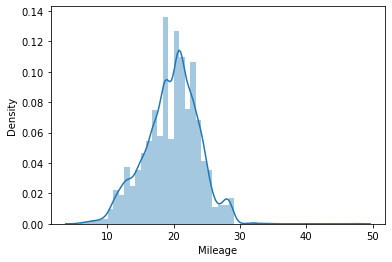

In [50]:
sns.distplot(df['Mileage']);

Here we can see the the data in the column has some skewness present, hence we wil be replacing the null values with their median.

In [51]:
# Replacing the null values with their median.

imp=SimpleImputer(strategy= 'median')
df['Mileage']= imp.fit_transform(df['Mileage'].values.reshape(-1,1))

In [52]:
# Rounding off the values.

df['Mileage']= round(df["Mileage"],2)

### Seats Column

In [53]:
df['Seats'].unique()

array([5, 7, 8, 6, 4, '5', '7', '-', '2', '4', '5Person', '5 Person',
       '4 Person', '7 Person', '8 Person', '2 Person', '7 & 8 Person',
       '6 Person', '7 & 9 Person'], dtype=object)

Here too, we can see that we have object datatype because of certain unwanted strings. Lets remove them.

In [54]:
# Removing the unwanted strings.

df['Seats']= df['Seats'].str.replace(' Person', '')
df['Seats']= df['Seats'].str.replace('Person', '')
df['Seats']= df['Seats'].str.replace('7 & ', '')

# The column contains some missing values, we are converting them to nan.
df['Seats']= df['Seats'].replace('-', np.nan)

In [55]:
# Replacing the null values with the most frequent value.

imp=SimpleImputer(strategy= 'most_frequent')
df['Seats']= imp.fit_transform(df['Seats'].values.reshape(-1,1))

In [56]:
# Converting the datatype to integer.

df['Seats']= df['Seats'].astype(int)

We converted the data to integer datatype, as it now contains only integer data.

### Price Column

In [57]:
df['Price']

0        6,65,000
1        3,99,500
2        1,77,500
3        3,60,000
4        2,79,000
          ...    
6227    28.5 Lakh
6228      14 Lakh
6229    36.5 Lakh
6230    16.5 Lakh
6231    14.5 Lakh
Name: Price, Length: 6231, dtype: object

Here we also have object datatype. Also many values are in decimal format of the amount. We need to treat them.

In [58]:
# Removing the unwanted character.

df['Price']= df['Price'].str.replace('*', '')

In [59]:
df['Price']= df['Price'].apply(lambda x: x.replace(" Lakh", '0000') if len(x.split('.')[-1])== 6 else x.replace(" Lakh", '000') if len(x.split('.')[-1])== 7
                   else x)

Here we are converting the price in lakhs given in alphabetic form into numeric form.

In [60]:
df['Price']= df['Price'].apply(lambda x: x.replace(" Crore", '000000') if len(x.split('.')[-1])== 7 else x.replace(" Crore", '00000') if len(x.split('.')[-1])== 8
                   else x)

Here we are converting the price in crores given in alphabetic form into numeric form.

In [61]:
df['Price']= df['Price'].apply(lambda x: x.replace("000", '00000') if len(x)< 6 else x)

After the above conversions some data with no decimal value were also replaced, and here we have corrected the data.

In [62]:
# Removing the now unwanted characters.

df['Price']= df['Price'].str.replace(',', '')
df['Price']= df['Price'].str.replace('.', '')

In [63]:
# Converting the datatype to integer.

df['Price']= df['Price'].astype(int)

In [64]:
df['Price']

0        665000
1        399500
2        177500
3        360000
4        279000
         ...   
6227    2850000
6228    1400000
6229    3650000
6230    1650000
6231    1450000
Name: Price, Length: 6231, dtype: int32

### Data Preprocessing

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6231 entries, 0 to 6231
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year of manufacture  6231 non-null   int64  
 1   Company              6231 non-null   object 
 2   Model                6231 non-null   object 
 3   Fuel type            6231 non-null   object 
 4   Location             6231 non-null   object 
 5   Kilometers driven    6231 non-null   int32  
 6   No. of Owners        6231 non-null   int32  
 7   Transmission         6231 non-null   object 
 8   Mileage              6231 non-null   float64
 9   Seats                6231 non-null   int32  
 10  Price                6231 non-null   int32  
dtypes: float64(1), int32(4), int64(1), object(5)
memory usage: 646.8+ KB


We now have all the numeric data columns as integer or float datatype. also no nullvalues are present. We can proceed.

### Encoding the categorical features.

In [66]:
df.dtypes

Year of manufacture      int64
Company                 object
Model                   object
Fuel type               object
Location                object
Kilometers driven        int32
No. of Owners            int32
Transmission            object
Mileage                float64
Seats                    int32
Price                    int32
dtype: object

The object type data need to be encoded and we will also be encoding the year column, as years can be considered as a descrete numeric feature.

In [67]:
# Creating a copy of non-encoded dataframe.

df1= df.copy()

In [68]:
# Encoding

from sklearn.preprocessing import LabelEncoder

enc= LabelEncoder()
for i in df.columns:
    if df[i].dtypes== 'O':
        df[i]= enc.fit_transform(df[i].values.reshape(-1,1))
        
# encoding the year column as well.

df['Year of manufacture']= enc.fit_transform(df['Year of manufacture'].values.reshape(-1,1))

In [69]:
df

,Year of manufacture,Company,Model,Fuel type,Location,Kilometers driven,No. of Owners,Transmission,Mileage,Seats,Price
0,17,19,264,3,0,9718,1,1,21.21,5,665000
1,9,6,67,3,0,38647,1,1,17.00,5,399500
2,10,19,35,3,0,89579,1,1,20.92,5,177500
3,14,19,297,3,0,81674,1,1,21.79,5,360000
4,10,19,97,3,0,57341,1,1,16.11,5,279000
...,...,...,...,...,...,...,...,...,...,...,...
6227,16,20,133,1,2,28200,1,0,17.90,5,2850000
6228,11,0,19,1,2,47800,2,0,17.11,5,1400000
6229,16,0,21,1,2,22000,1,0,16.66,5,3650000
6230,11,0,21,1,2,63300,1,0,16.66,5,1650000


The dataset has been encoded, we can proceed further.

### Visualization

In [70]:
df.describe()

,Year of manufacture,Company,Model,Fuel type,Location,Kilometers driven,No. of Owners,Transmission,Mileage,Seats,Price
count,6231.000000,6231.000000,6231.000000,6231.000000,6231.000000,6231.000000,6231.000000,6231.000000,6231.000000,6231.000000,6.231000e+03
mean,13.390467,15.650618,152.775638,2.337827,6.559942,45313.048146,1.185364,0.780613,19.798963,5.110255,9.449028e+05
std,2.969319,7.749120,94.635903,0.945368,4.472986,36720.379420,0.435744,0.413864,3.643095,0.541275,1.456226e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,353.000000,0.000000,0.000000,5.900000,2.000000,6.000000e+04
25%,11.000000,8.000000,65.000000,1.000000,3.000000,21861.000000,1.000000,1.000000,18.000000,5.000000,3.500990e+05
50%,14.000000,19.000000,146.000000,3.000000,7.000000,39557.000000,1.000000,1.000000,20.360000,5.000000,4.971990e+05
75%,16.000000,19.000000,256.000000,3.000000,10.000000,62000.000000,1.000000,1.000000,21.790000,5.000000,7.500000e+05
max,19.000000,31.000000,334.000000,3.000000,14.000000,750000.000000,4.000000,1.000000,47.450000,9.000000,2.150000e+07


Here we can check the data description of the numeric columns, We can see that the values of mean and median in the features are not very far from each other, which signifies that the data in the features may be normally distributed. Also we can see that the columns do not have a huge difference between the mean and the maximum value, which means that the data in the columns are less prone to outliers.

<function matplotlib.pyplot.show(*args, **kw)>

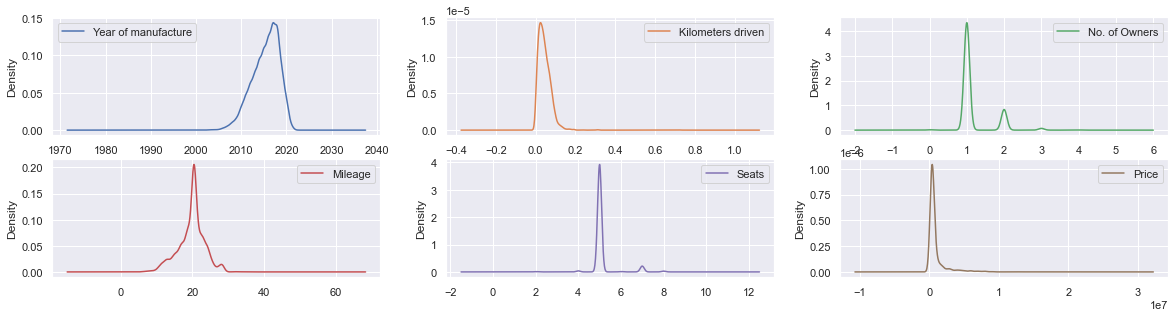

In [273]:
df1.plot(kind='density', subplots= True, layout=(4,3),sharex=False, legend=True, figsize=[20,10])
plt.show

Here, we can check the distribution of all our numeric feature columns. lets inspect closely.

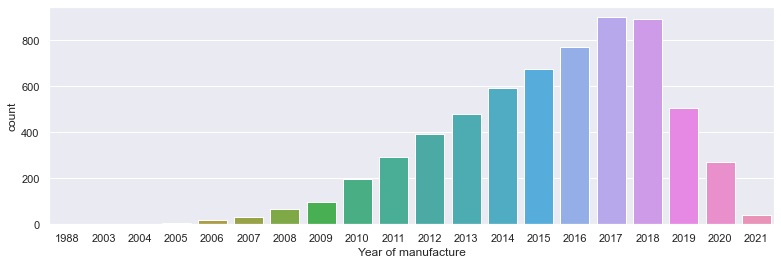

In [274]:
plt.figure(figsize=[13,4])
sns.countplot(df1['Year of manufacture'])
plt.show()

Here we can see that the majority of the cars for sale are from the year 2017 and 2018.

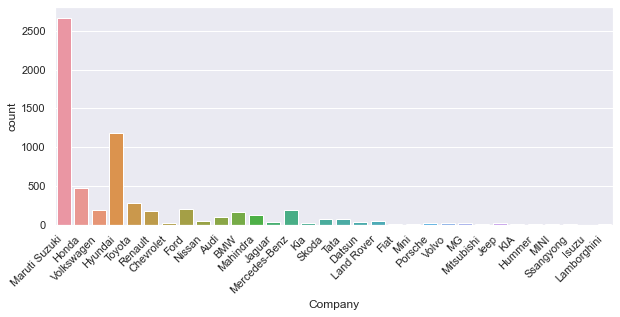

In [275]:
plt.figure(figsize=[10,4])
sns.countplot(df1['Company'])
plt.xticks(rotation = 45, ha = 'right')
plt.show()

We have the majority of the used cars for sale from Maruti suzuki which is folowed by hyundai.

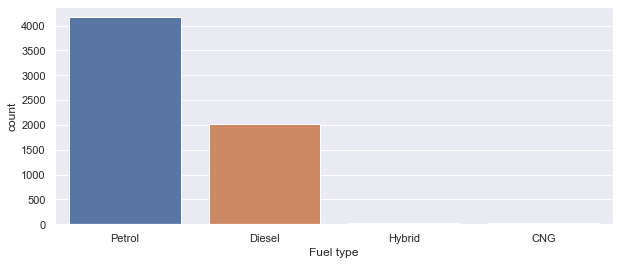

In [270]:
plt.figure(figsize=[10,4])
sns.countplot(df1['Fuel type'])
plt.show()

The fuel type of most of the cars is petrol followed by diesel.

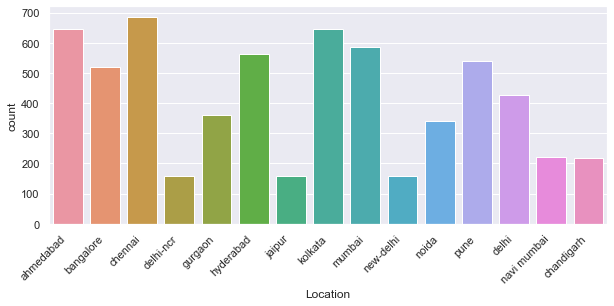

In [276]:
plt.figure(figsize=[10,4])
sns.countplot(df1['Location'])
plt.xticks(rotation = 45, ha = 'right')
plt.show()

Here we can see that all the cars are nearly equaly distributed from all the cities.

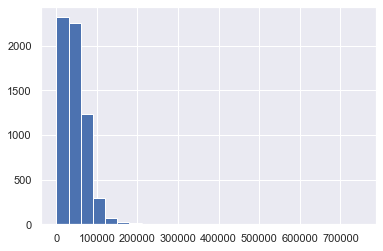

In [194]:
sns.set(style='darkgrid')
plt.hist(df['Kilometers driven'], bins=25)
plt.show()

Here certain skewness can be seen the distribution of the data. right tailed skewed.

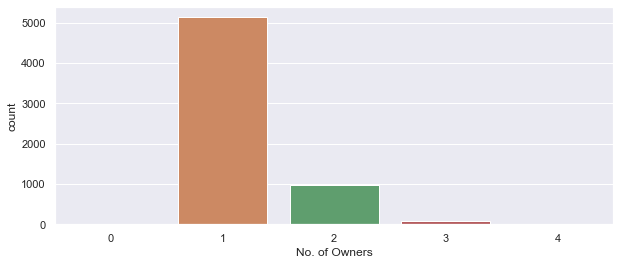

In [195]:
plt.figure(figsize=[10,4])
sns.countplot(df['No. of Owners'])
plt.show()

Here we can see most of the car are from 1st owners followed by 2nd owners.

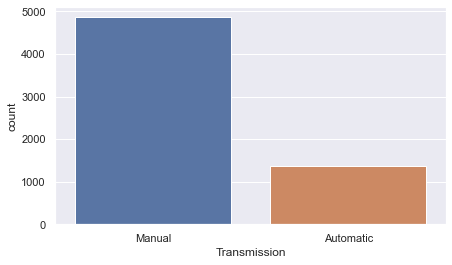

In [268]:
plt.figure(figsize=[7,4])
sns.countplot(df1['Transmission'])
plt.show()

The cars have Manual transmision are higher than that of automatic.

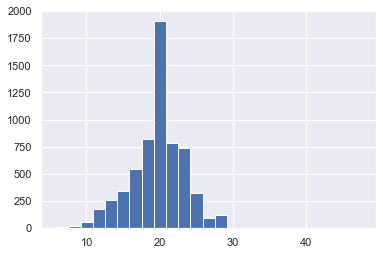

In [197]:
sns.set(style='darkgrid')
plt.hist(df['Mileage'], bins=25)
plt.show()

The mileage data can be seen having near to normal distribution.

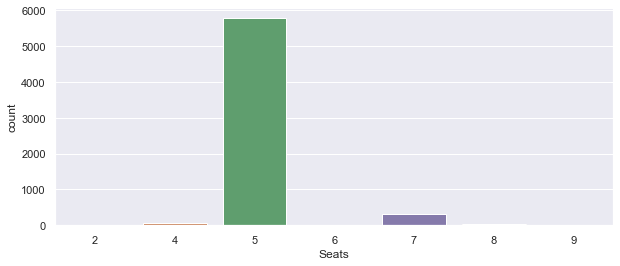

In [198]:
plt.figure(figsize=[10,4])
sns.countplot(df['Seats'])
plt.show()

The five seater cars are the majority here which is followed by seven seaters.

### Checking Correlation

In [199]:
cor= df.corr()
cor

,Year of manufacture,Company,Model,Fuel type,Location,Kilometers driven,No. of Owners,Transmission,Mileage,Seats,Price
Year of manufacture,1.000000,0.037057,-0.022552,0.013041,-0.071356,-0.398068,-0.260272,-0.079837,0.268277,0.017952,0.194798
Company,0.037057,1.000000,0.166838,-0.019096,0.038492,0.041861,-0.037956,0.099519,0.113039,0.182351,-0.061654
Model,-0.022552,0.166838,1.000000,-0.151853,0.002329,0.082874,-0.045370,0.035599,-0.058330,0.070860,0.013923
Fuel type,0.013041,-0.019096,-0.151853,1.000000,0.060253,-0.331482,0.030709,0.180023,-0.072399,-0.282657,-0.258667
Location,-0.071356,0.038492,0.002329,0.060253,1.000000,-0.011806,-0.031437,0.043392,0.057533,-0.026962,-0.074724
Kilometers driven,-0.398068,0.041861,0.082874,-0.331482,-0.011806,1.000000,0.119698,-0.014949,-0.126149,0.181998,-0.013992
No. of Owners,-0.260272,-0.037956,-0.045370,0.030709,-0.031437,0.119698,1.000000,-0.029023,-0.107987,-0.011123,0.000337
Transmission,-0.079837,0.099519,0.035599,0.180023,0.043392,-0.014949,-0.029023,1.000000,0.297265,0.001948,-0.476409
Mileage,0.268277,0.113039,-0.058330,-0.072399,0.057533,-0.126149,-0.107987,0.297265,1.000000,-0.246368,-0.203829
Seats,0.017952,0.182351,0.070860,-0.282657,-0.026962,0.181998,-0.011123,0.001948,-0.246368,1.000000,0.026530


Here we can see the correlation between all the columns, lets visualize it for better understanding.

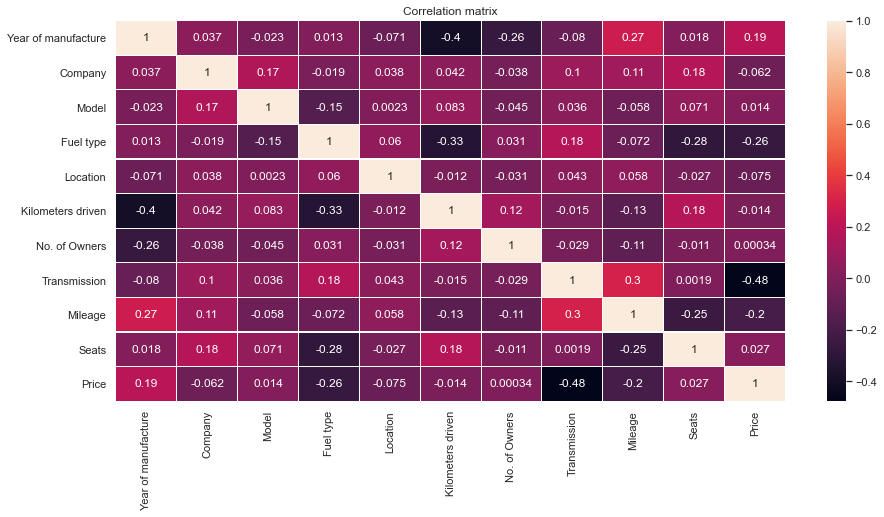

In [200]:
plt.figure(figsize=[15,7])
sns.heatmap(cor, annot=True, linewidth=0.1);
plt.title('Correlation matrix')
plt.show()

Here in the correlation matrix, we can see some positive as well as negative correlations.Among the independent columns, We can see transmission and mileage having a good positive correlation and Kilometers and the year can be seen having a very negative correlation. Lets check the correlation of the target with the independent columns.

In [212]:
cor['Price'].sort_values(ascending=False)

Price                  1.000000
Year of manufacture    0.194798
Seats                  0.026530
Model                  0.013923
No. of Owners          0.000337
Kilometers driven     -0.013992
Company               -0.061654
Location              -0.074724
Mileage               -0.203829
Fuel type             -0.258667
Transmission          -0.476409
Name: Price, dtype: float64

We can check the correlation of our target with the independent columns. lets visualize it for better understanding.

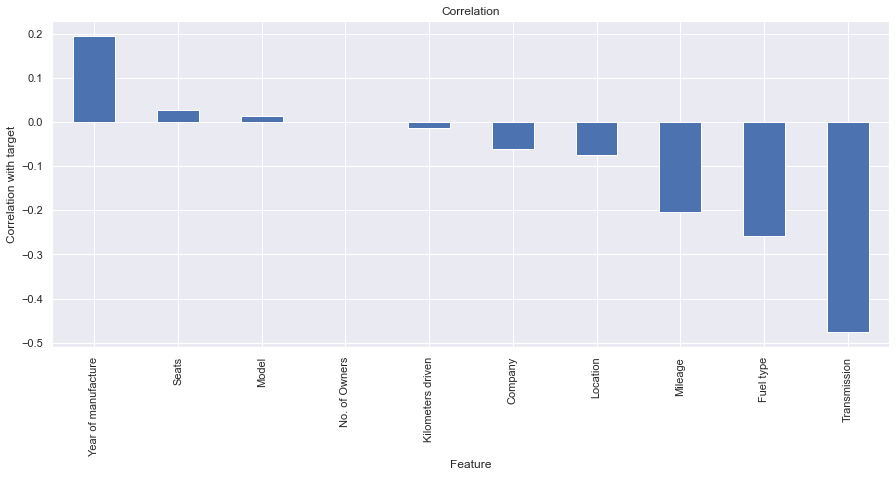

In [213]:
plt.figure(figsize=(15,6))
cor['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Correlation with target')
plt.title('Correlation')
plt.show()

Here we see that the Year column is the most positively correlated feature with the target and the Transmission feautre has the most negative correlation with the target followed by the Fuel type feature. The number of owners can be seen having a very less correlation with the target.

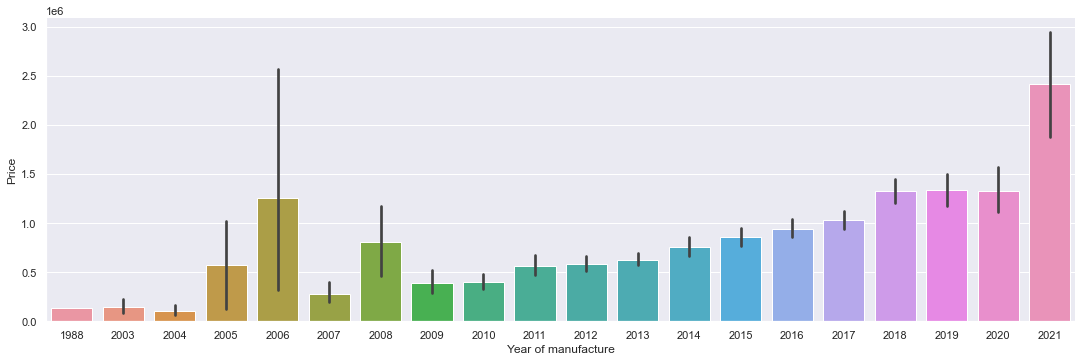

In [277]:
sns.catplot(x='Year of manufacture',y='Price', data=df1, kind='bar', aspect=3);

Here we can see a good positive correlation, More new the year is, the price goes high.

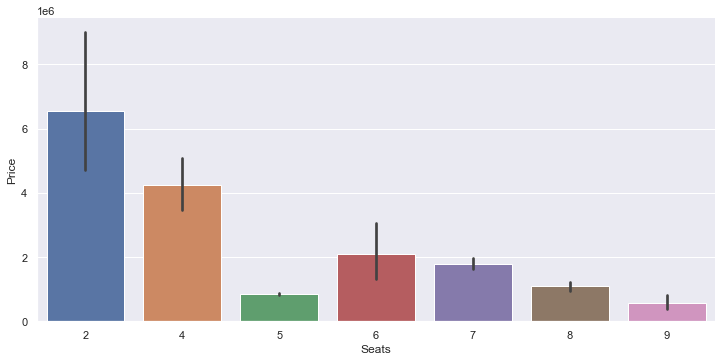

In [215]:
sns.catplot(x='Seats',y='Price', data=df, kind='bar', aspect=2);

We can see a curve here, The graph shows that the 2 seater and 4 seater cars are priced higher that the others.

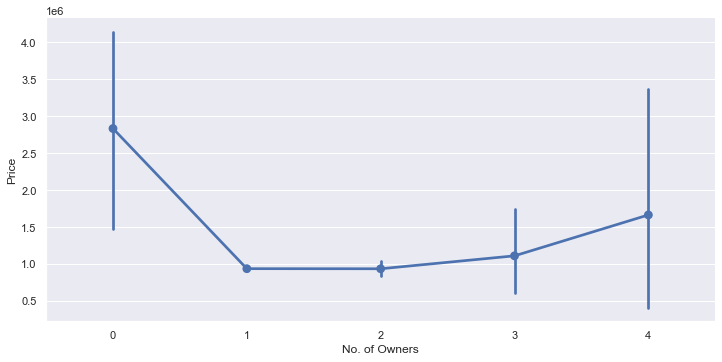

In [220]:
sns.factorplot(x ='No. of Owners', y ='Price', data = df, aspect=2);

We dont see any kind of good relation between the columns here.

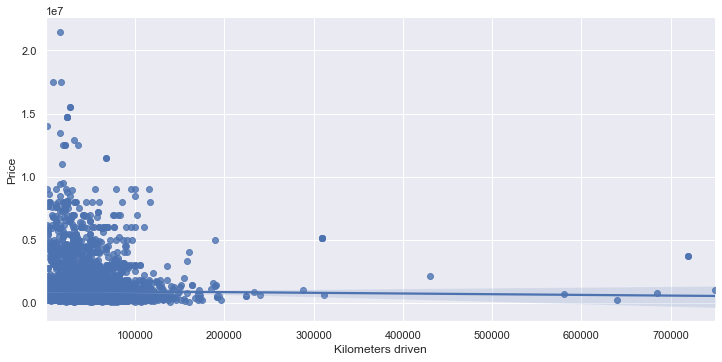

In [221]:
sns.lmplot(x ='Kilometers driven',y ='Price', data = df, aspect=2);

Here we can see a very less correlation between the price and the kilometers columns.

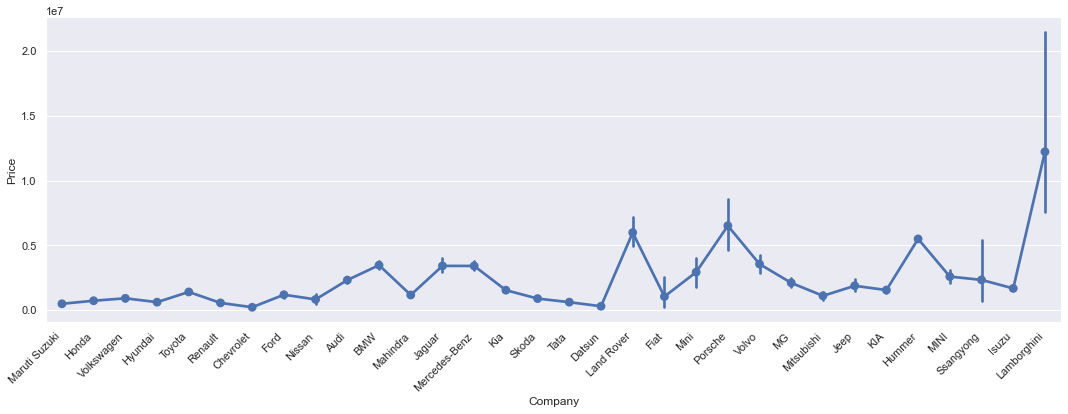

In [279]:
sns.factorplot(x ='Company', y ='Price', data = df1, aspect=3);
plt.xticks(rotation = 45, ha = 'right')
plt.show()

The graph shows that the Lamborgini cars are prices the highest, which is followed by Porsche and Land rover.

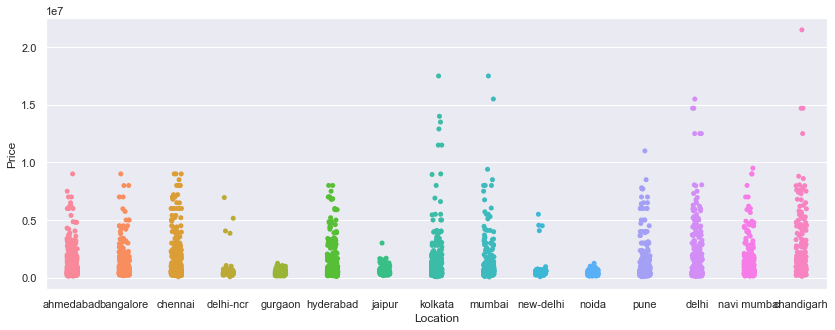

In [280]:
plt.figure(figsize=[14,5])
sns.stripplot(data= df1, x='Location', y='Price')
plt.show()

Here too we can see a very less correlation, All the locations have cars belonging to all price ranges.

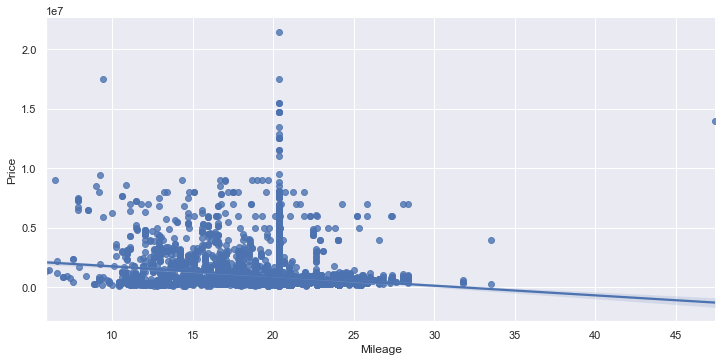

In [242]:
sns.lmplot(x ='Mileage',y ='Price', data = df, aspect=2);

The graph shows a slightly negative correlation between the columns. The cas which cost more provide less mileage.

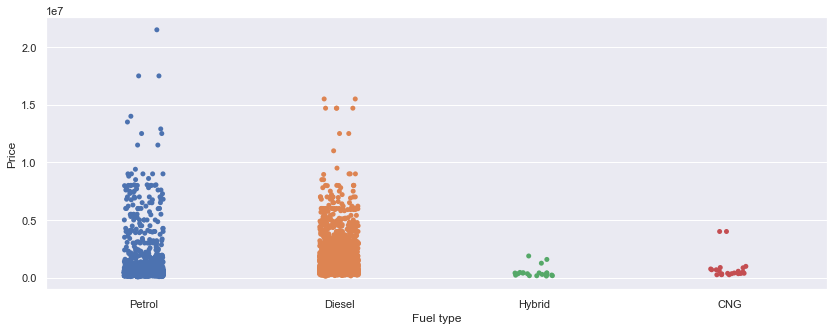

In [267]:
plt.figure(figsize=[14,5])
sns.stripplot(data= df1, x='Fuel type', y='Price')
plt.show()

The graph shows the petrol and diseal cars having more cost.

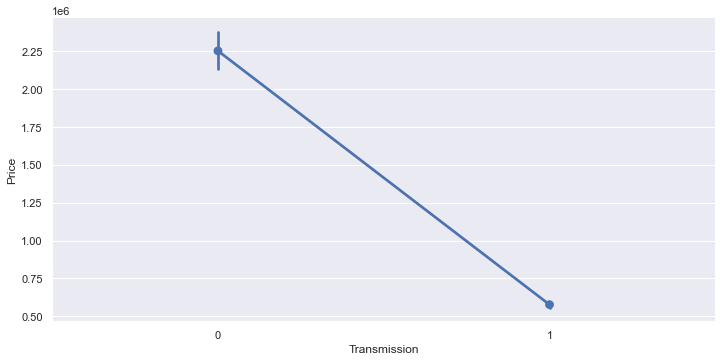

In [281]:
sns.factorplot(x ='Transmission', y ='Price', data = df, aspect=2);

We have a very negative correlation here, this shows that the cars with Automatic transmission are more costlier than the Manual ones.

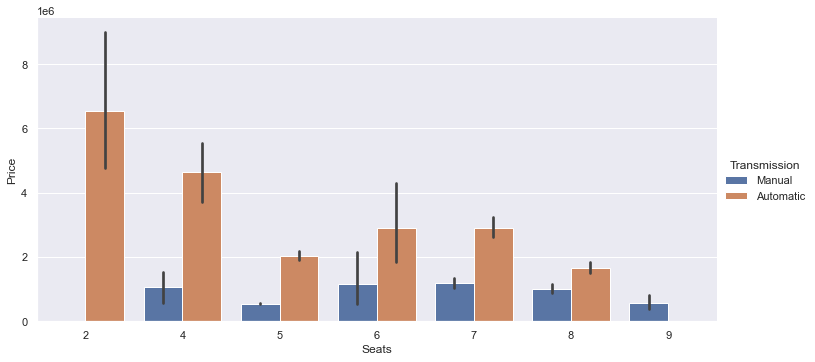

In [283]:
sns.catplot(x='Seats',y='Price', hue= 'Transmission', data=df1, kind='bar', aspect=2);

Here we see that the Automatic transmission cars are more for all number of seaters and their price are also higher.

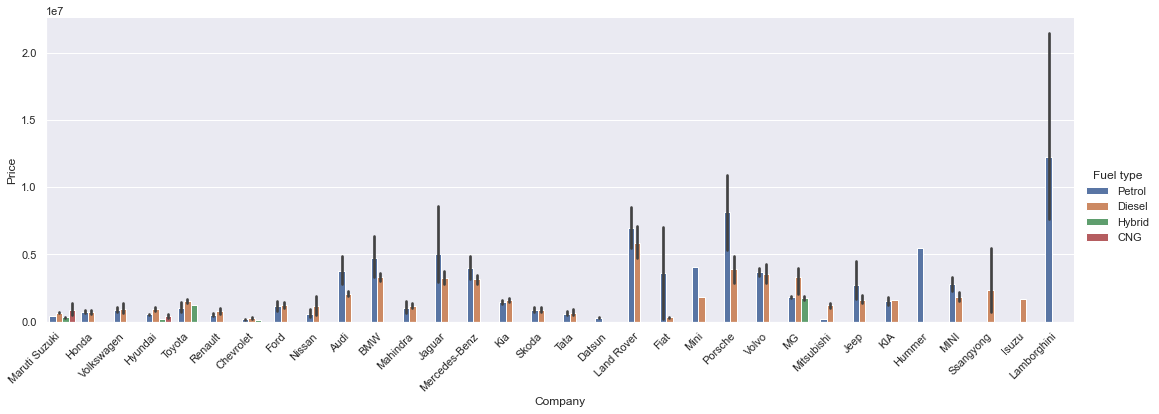

In [285]:
sns.catplot(x='Company',y='Price', hue= 'Fuel type', data=df1, kind='bar', aspect=3);
plt.xticks(rotation = 45, ha = 'right')
plt.show()

The graph shows that companies with high cost cars are using fuel type as petrol.

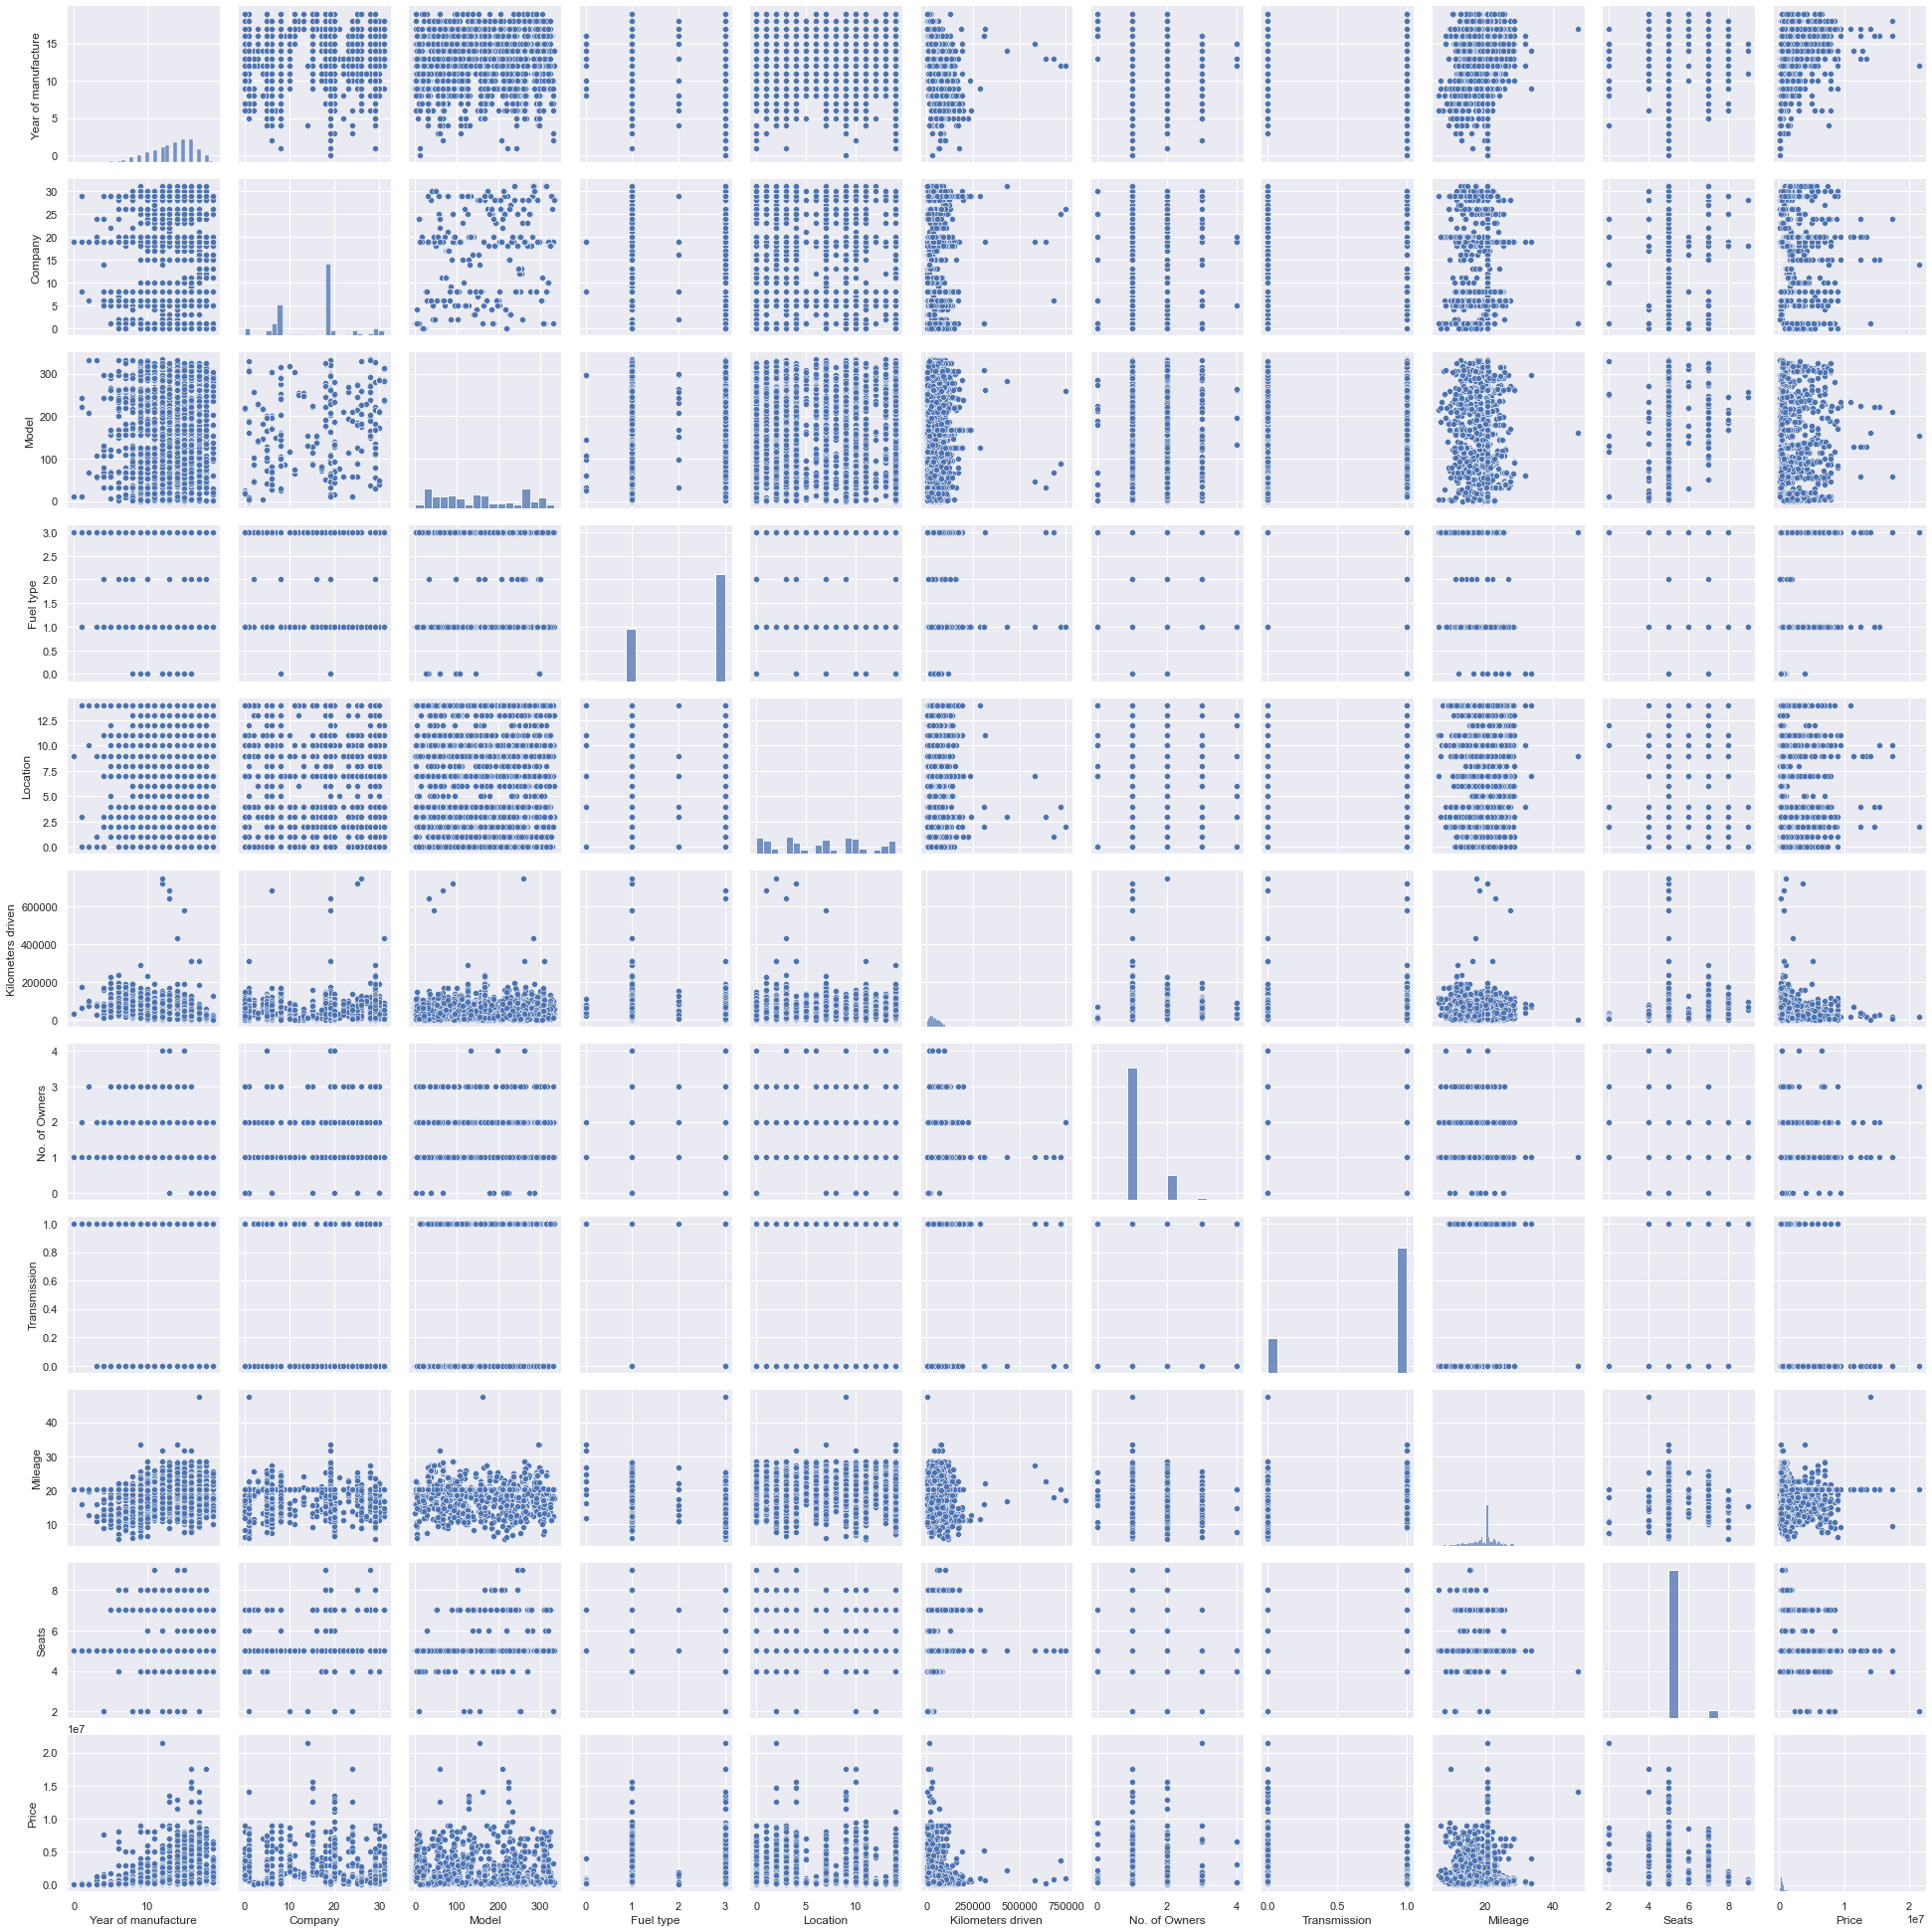

In [261]:
sns.pairplot(df);

Here we can see the correlation of all the columns in our dataset(Multivariate analysis).

### Checking Outliers

We will the be checking for outliers only in the continious numeric features.

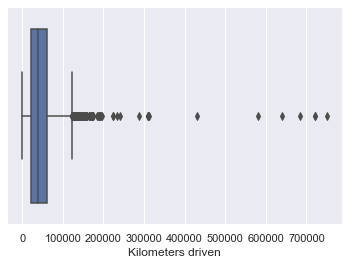

In [249]:
sns.boxplot(df['Kilometers driven']);

Some outliers can be seen here, but the majority of the outliers are very close to the threshold. 

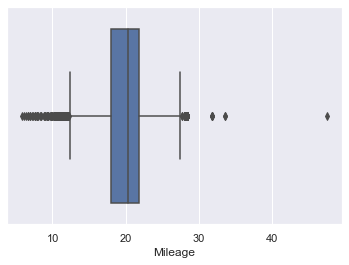

In [250]:
sns.boxplot(df['Mileage']);

Some ouliers can be seen here as well, but they are very close to the threshold, with only one far away.

Overall there are very few outliers and removing them will lead to data loss, Hence we will proceed.

### Checking Skewness

In [72]:
a=['Mileage','Kilometers driven']
df[a].skew()

Mileage             -0.326618
Kilometers driven    6.237845
dtype: float64

Little skewness can be seen the Kilometers column, lets treat this.

In [73]:
from sklearn.preprocessing import power_transform

df['Kilometers driven']=power_transform(df['Kilometers driven'].values.reshape(-1,1))

In [74]:
df[a].skew()

Mileage             -0.326618
Kilometers driven    0.065811
dtype: float64

The skewness has been reduced. Lets proceed.

### Sclaing

In [75]:
# First lets split the data into target and features.

x= df.drop(['Price','No. of Owners'], axis=1) # By hit and trial we found the 'no of owners' column effecting the model performance. Hence we will not be using it.
y= df['Price']

In [76]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,Year of manufacture,Company,Model,Fuel type,Location,Kilometers driven,Transmission,Mileage,Seats
0,1.215707,0.432262,1.175381,0.700496,-1.466687,-1.450382,0.530136,0.387349,-0.203712
1,-1.478730,-1.245482,-0.906448,0.700496,-1.466687,0.027489,0.530136,-0.768354,-0.203712
2,-1.141925,0.432262,-1.244613,0.700496,-1.466687,1.307451,0.530136,0.307740,-0.203712
3,0.205294,0.432262,1.524114,0.700496,-1.466687,1.149266,0.530136,0.546567,-0.203712
4,-1.141925,0.432262,-0.589418,0.700496,-1.466687,0.585283,0.530136,-1.012672,-0.203712
...,...,...,...,...,...,...,...,...,...
6226,0.878903,0.561319,-0.208982,-1.415253,-1.019522,-0.369874,-1.886308,-0.521292,-0.203712
6227,-0.805120,-2.019826,-1.413696,-1.415253,-1.019522,0.319181,-1.886308,-0.738158,-0.203712
6228,0.878903,-2.019826,-1.392560,-1.415253,-1.019522,-0.655746,-1.886308,-0.861689,-0.203712
6229,-0.805120,-2.019826,-1.392560,-1.415253,-1.019522,0.736515,-1.886308,-0.861689,-0.203712


### Finding the best Random state

In [77]:
maxscr=0
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=.20,random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    predlr= lr.predict(x_test)
    scr= r2_score(y_test,predlr)
    if scr>maxscr:
        maxscr=scr
        maxrs= i
print('Best score: ', maxscr,'on random state', maxrs)

Best score:  0.4164264596460484 on random state 65


In [78]:
# Creating train and validation split using the random state found best.

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=.20,random_state=65)

### Model Training

In [79]:
lr.fit(x_train,y_train)
predlr= lr.predict(x_test)

print('Score: ',lr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predlr))
print('Mean absolute error:', mean_absolute_error(y_test,predlr))
print('Mean squared error:', mean_squared_error(y_test,predlr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predlr)))

Score:  0.297691391667149
r2 score:  0.4164264596460484
Mean absolute error: 512584.93508970994
Mean squared error: 897283410475.0093
Root mean squared error: 947250.4475982101


In [80]:
from sklearn.tree import DecisionTreeRegressor

dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt= dt.predict(x_test)

print('Score: ',dt.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,preddt))
print('Mean absolute error:', mean_absolute_error(y_test,preddt))
print('Mean squared error:', mean_squared_error(y_test,preddt))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,preddt)))

Score:  0.9999959689917485
r2 score:  0.4518090849178026
Mean absolute error: 247367.3648757017
Mean squared error: 842880253923.1499
Root mean squared error: 918085.1016780252


In [81]:
from sklearn.ensemble import RandomForestRegressor

fr=RandomForestRegressor()
fr.fit(x_train,y_train)
predfr=fr.predict(x_test)

print('Score: ',fr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predfr))
print('Mean absolute error:', mean_absolute_error(y_test,predfr))
print('Mean squared error:', mean_squared_error(y_test,predfr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predfr)))

Score:  0.9466800819880374
r2 score:  0.6746131683805578
Mean absolute error: 253163.77121357928
Mean squared error: 500304050492.19196
Root mean squared error: 707321.7446764888


In [82]:
from sklearn.svm import SVR

svr= SVR()
svr.fit(x_train,y_train)
preds= svr.predict(x_test)

print('Score: ',svr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,preds))
print('Mean absolute error:', mean_absolute_error(y_test,preds))
print('Mean squared error:', mean_squared_error(y_test,preds))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,preds)))

Score:  -0.09261032543837877
r2 score:  -0.10369442985354094
Mean absolute error: 555402.9385904536
Mean squared error: 1697004119721.7385
Root mean squared error: 1302691.1067945994


In [83]:
# Regularization

from sklearn.linear_model import Lasso

rd= Lasso()
rd.fit(x_train,y_train)
predrd= rd.predict(x_test)

print('Score: ',rd.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predrd))
print('Mean absolute error:', mean_absolute_error(y_test,predrd))
print('Mean squared error:', mean_squared_error(y_test,predrd))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predrd)))

Score:  0.29769139166243375
r2 score:  0.4164265397797099
Mean absolute error: 512583.80858675845
Mean squared error: 897283287264.1367
Root mean squared error: 947250.3825621485


In [84]:
from xgboost import XGBRegressor

xg = XGBRegressor()
xg.fit(x_train,y_train)
predx= xg.predict(x_test)

print('Score: ',xg.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predx))
print('Mean absolute error:', mean_absolute_error(y_test,predx))
print('Mean squared error:', mean_squared_error(y_test,predx))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predx)))

Score:  0.9623558762231919
r2 score:  0.6543959671140425
Mean absolute error: 284389.1507947198
Mean squared error: 531389351740.90155
Root mean squared error: 728964.5750932631


In the above codes, we are importing the models and then assigning the model to a variable. Using that variable we are training the model with the train sets of the feature and target and then we are predicting the target for the test feature set. And finally by comparing the predicted target and the actual target, we get the r2 score of the model and also the errors in it. we also find the training score of the model by comparing the training sets.

We found that the Random forest model and XG boost model are giving us the higest scores among all the models. Now lets ckeck the cross validation score of the models to see if there is any overfitting or underfitting in the models.

### Checking CV Score

In [85]:
from sklearn.model_selection import cross_val_score

scr= cross_val_score(lr,x,y,cv=4)
print('cross validation score for linear reg model: ', scr.mean())

cross validation score for linear reg model:  0.040710335923544616


In [86]:
scr= cross_val_score(dt,x,y,cv=4)
print('cross validation score for Decision tree reg model: ', scr.mean())

cross validation score for Decision tree reg model:  -0.710922502928012


In [87]:
scr= cross_val_score(fr,x,y,cv=4)
print('cross validation score for Random forest reg model: ', scr.mean())

cross validation score for Random forest reg model:  0.2748892377121416


In [88]:
scr= cross_val_score(svr,x,y,cv=4)
print('cross validation score for support vector reg model: ', scr.mean())

cross validation score for support vector reg model:  -0.1353840660548754


In [89]:
scr= cross_val_score(rd,x,y,cv=4)
print('cross validation score for Ridge reg model: ', scr.mean())

cross validation score for Ridge reg model:  0.04071101034862937


In [609]:
scr= cross_val_score(xg,x,y,cv=4)
print('cross validation score for xgboost model: ', scr.mean())

cross validation score for xgboost model:  0.19732923776775368


Here we have checked the cross validation score of all the models, Among all he models here also the Random forest and XG boost are giving us a higher score. And the difference between the cv score and r2 score is lowest in these two models, lets now hyperparameter tune both the models and find the best model between the two.

### Hyper Parameter tuning

In [90]:
from sklearn.model_selection import RandomizedSearchCV

par= {'n_estimators':[50,100,150], 'max_depth':[5,6,7,8,9,10], 'criterion':['mse','mae'], 'max_features' : ["auto", "sqrt", "log2"]}

rcvfr= RandomizedSearchCV(fr,par,cv=5) 
rcvfr.fit(x_train,y_train)

rcvfr.best_params_

{'n_estimators': 150,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'mse'}

Here we are hypertuning the model by testing the model with all its different parameters and finding the best performing parameters for the model. And now using the above parameters, we create our model.

In [91]:
# Using the above parameter which are found to be best, we create our model.

finalmodel1= RandomForestRegressor(n_estimators= 150, max_features= 'auto', max_depth=10, criterion= 'mse')
finalmodel1.fit(x_train,y_train)
predf1=finalmodel1.predict(x_test)

print('Score: ',finalmodel1.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predf1))
print('Mean absolute error:', mean_absolute_error(y_test,predf1))
print('Mean squared error:', mean_squared_error(y_test,predf1))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predf1)))

Score:  0.9024221566129639
r2 score:  0.6747479865303012
Mean absolute error: 273757.0358143357
Mean squared error: 500096758555.8196
Root mean squared error: 707175.1965077816


With the random forest model we are getting a training score of 90% and an r2 score of 67%.

In [98]:
par1= {'n_estimators':[50,100,150], 'max_depth':[5,6,7,8,9,10], 'learning_rate' :[0.001, 0.01, 0.1,1] }

gcvxg= RandomizedSearchCV(xg, par1,cv=5) 
gcvxg.fit(x_train,y_train)
gcvxg.best_params_

{'n_estimators': 150, 'max_depth': 8, 'learning_rate': 0.1}

In [99]:
# Now using the above parameter which are found to be best, we create our model.

finalmodel2= XGBRegressor(n_estimators= 150, learning_rate= 0.1, max_depth=8)
finalmodel2.fit(x_train,y_train)
predf2=finalmodel2.predict(x_test)
print('Score: ',finalmodel2.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predf2))
print('Mean absolute error:', mean_absolute_error(y_test,predf2))
print('Mean squared error:', mean_squared_error(y_test,predf2))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predf2)))

Score:  0.9782524158878381
r2 score:  0.6836119000511134
Mean absolute error: 256161.64148957498
Mean squared error: 486467897745.4306
Root mean squared error: 697472.5068025482


With the XG Boost model we are getting a training score of 97% and an r2 score of 68%.

By analysing both the models, we can say that the XG Boost model is performing slightly better as compared to Random forest regressor model, as the training score and r2 score are slightly better there and also the errors are comparatively less. Hence we will make XG Boost model our final model.

### Saving the Model

In [105]:
import joblib

joblib.dump(finalmodel2,'UsedCarPrice_project.pkl')

['UsedCarPrice_project.pkl']